<a href="https://colab.research.google.com/github/BlackPearl7703/Pytorch/blob/main/intro_to_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
2+2

4

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
class Model(nn.Module):
  #we are trying for a exmaple of taking 4 features of a flower and guessing its class
  #4 input features , 2 hidden layers ,  output layer(3 classes of flower)
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        super().__init__(); #used to instantiate out nn module
        self.fc1=nn.Linear(in_features,h1)
        self.fc2=nn.Linear(h1,h2)
        self.out=nn.Linear(h2,out_features)

    def forward(self,x):
      x=F.relu(self.fc1(x));
      x=F.relu(self.fc2(x));
      x=self.out(x);
      return x



In [6]:
torch.manual_seed(40)
model = Model()

In [7]:
#load data

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df=pd.read_csv(url)

In [9]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
#changed output values into numerics

my_df['species']=my_df['species'].replace('setosa',0.0);
my_df['species']=my_df['species'].replace('versicolor',1.0);
my_df['species']=my_df['species'].replace('virginica',2.0);

my_df


<ipython-input-10-ee2253c2f8dd>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species']=my_df['species'].replace('virginica',2.0);


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [11]:
#convet them into what is input and what is output
x=my_df.drop('species',axis=1).values #simultaneously converting them into arrays
y=my_df['species'].values

In [12]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [13]:
#Train Test Split
from sklearn.model_selection import train_test_split


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41);

In [15]:
#convert fetaures and output to tensors
import torch
x_train=torch.FloatTensor(x_train);
x_test=torch.FloatTensor(x_test);
y_train=torch.LongTensor(y_train);  #long tensors are 64 bit
y_test=torch.LongTensor(y_test);

In [16]:
# set criteria of model to measure the error , how far off the prediction from the data
criteria=nn.CrossEntropyLoss();
#choose  adam optimiser lr=learning rate (if error doesnot go down we will lower our lr )
optimizer =torch.optim.Adam(model.parameters(),lr=0.01); #its baically alpha value



In [17]:
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [18]:
#model traning
# epochs (one run of all the given train data)
epochs=100
losses=[]
for i in range(epochs):
  i+=1
  #generate a prediction
  y_pred=model.forward(x_train)
  #calculate the loss
  loss=criteria(y_pred,y_train)
  #append the loss
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i%10==0:
    print(f'epoch:{i} ans loss :{loss}')

  #now time for backpropagation (take the error of forward and update the weights )
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:10 ans loss :1.0943208932876587
epoch:20 ans loss :1.0754687786102295
epoch:30 ans loss :1.0138477087020874
epoch:40 ans loss :0.8495810627937317
epoch:50 ans loss :0.6227145791053772
epoch:60 ans loss :0.46190449595451355
epoch:70 ans loss :0.37963029742240906
epoch:80 ans loss :0.30735889077186584
epoch:90 ans loss :0.21214699745178223
epoch:100 ans loss :0.12741607427597046


Text(0.5, 0, 'epoch')

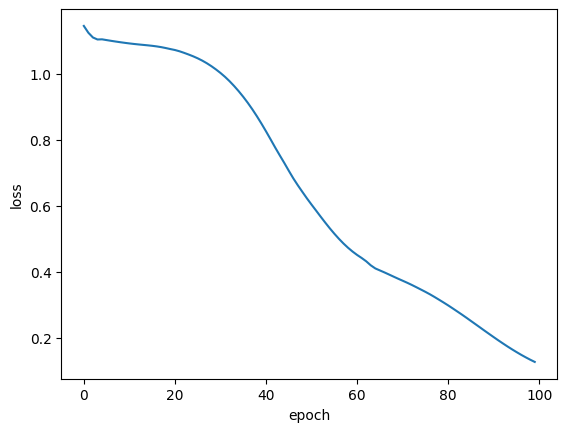

In [19]:
plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epoch')

In [24]:
#evaluate model on test data (validate model)
with torch.no_grad():
  #predited output
  y_eval=model.forward(x_test)

  #loss occured through cross entropy loss
  loss=criteria(y_eval,y_test)


tensor([[-3.6335,  3.2235,  4.4732],
        [-4.5796,  3.4836,  6.3521],
        [-5.1950,  3.9400,  7.0532],
        [-2.4142,  3.1329,  1.6083],
        [-4.2703,  3.5535,  5.4568],
        [-1.6654,  2.9701,  0.0433],
        [-3.4267,  3.2675,  3.8797],
        [-2.2085,  3.0786,  1.1957],
        [-3.7957,  3.3972,  4.5612],
        [-4.8598,  3.6619,  6.7248],
        [-3.2253,  3.2160,  3.4726],
        [ 4.3592, -0.7624, -9.9932],
        [ 3.9921, -0.6988, -9.0357],
        [-0.8483,  2.4667, -1.0997],
        [ 4.0537, -0.5293, -9.4724],
        [-3.3053,  3.3206,  3.4819],
        [ 4.0488, -0.5940, -9.3593],
        [-3.5064,  3.2476,  4.1137],
        [ 4.1740, -0.6703, -9.6022],
        [ 3.4422, -0.2625, -8.1240],
        [-1.2974,  2.7421, -0.4574],
        [-4.5884,  3.6319,  6.1048],
        [ 4.2213, -0.7179, -9.6652],
        [ 4.1463, -0.7255, -9.4380],
        [-1.0000,  2.6065, -1.0287],
        [-1.7968,  2.9489,  0.4084],
        [-2.5199,  3.2080,  1.7348],
 

In [22]:
loss

tensor(0.1680)

In [28]:
correct=0
with torch.no_grad():
  for i,data in enumerate(x_test): # index and features
    y_val=model.forward(data)

    print(f'{i+1:2}. {str(y_val)} \t {y_test[i]} \t  {y_val.argmax().item()}')
    #correct or not
    if y_val.argmax().item()==y_test[i]:
      correct+=1
print( f'{correct} out of {len(y_test)} = {100*correct/len(y_test)}%')


 1. tensor([-3.6335,  3.2235,  4.4732]) 	 2 	  2
 2. tensor([-4.5796,  3.4836,  6.3521]) 	 2 	  2
 3. tensor([-5.1950,  3.9400,  7.0532]) 	 2 	  2
 4. tensor([-2.4142,  3.1329,  1.6083]) 	 1 	  1
 5. tensor([-4.2703,  3.5535,  5.4568]) 	 2 	  2
 6. tensor([-1.6654,  2.9701,  0.0433]) 	 1 	  1
 7. tensor([-3.4267,  3.2675,  3.8797]) 	 2 	  2
 8. tensor([-2.2085,  3.0786,  1.1957]) 	 1 	  1
 9. tensor([-3.7957,  3.3972,  4.5612]) 	 2 	  2
10. tensor([-4.8598,  3.6619,  6.7248]) 	 2 	  2
11. tensor([-3.2253,  3.2160,  3.4726]) 	 2 	  2
12. tensor([ 4.3592, -0.7624, -9.9932]) 	 0 	  0
13. tensor([ 3.9921, -0.6988, -9.0357]) 	 0 	  0
14. tensor([-0.8483,  2.4667, -1.0997]) 	 1 	  1
15. tensor([ 4.0537, -0.5293, -9.4724]) 	 0 	  0
16. tensor([-3.3053,  3.3206,  3.4819]) 	 2 	  2
17. tensor([ 4.0488, -0.5940, -9.3593]) 	 0 	  0
18. tensor([-3.5064,  3.2476,  4.1137]) 	 1 	  2
19. tensor([ 4.1740, -0.6703, -9.6022]) 	 0 	  0
20. tensor([ 3.4422, -0.2625, -8.1240]) 	 0 	  0
21. tensor([-1.2974,

In [33]:
new_iris=torch.tensor([5.6,3.7,2.2,2.0])

In [34]:
with torch.no_grad():
  print(model.forward(new_iris))
  print(model.forward(new_iris).argmax().item())

tensor([ 2.0342,  0.5889, -5.8887])
0


In [38]:
#Save and Load NN  -->> Intro TO DL
torch.save(model.state_dict(),'iris_model')

In [44]:
#load the model saved
new_model=Model()
new_model.load_state_dict(torch.load('iris_model'))


<ipython-input-44-86265ff44471>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_model'))


<All keys matched successfully>

In [45]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)